In [1]:
# Parameters
first_date = "2021-02-11"
end_date = "2021-04-11"


# Prueba interciclo #1
Realizado por: Tatiana Cárdenas Jho

In [2]:
#Problema:
#Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real expuesto en el documento del docente.

#Importación de librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
print('Importadas')

Importadas


In [3]:
#Carga de datos

#Vacunas
df=pd.read_csv('in/vacunas.csv', sep = ',') 
print('Importadas csv vacunas')

#Fabricantes
df_prov=pd.read_csv('in/fabricantes.csv')
print('Importadas csv fabricantes', sep = ',')

Importadas csv vacunas
Importadas csv fabricantes


In [4]:
#Info y keys de CSV-Vacunas
df.info()
df.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fecha          49 non-null     object
 1   dosis_total    49 non-null     int64 
 2   primera_dosis  49 non-null     int64 
 3   segunda_dosis  49 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


Index(['fecha', 'dosis_total', 'primera_dosis', 'segunda_dosis'], dtype='object')

In [5]:
#Info y keys de CSV-Fabricante
df_prov.info()
df_prov.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   vaccine     18 non-null     object
 1   total       18 non-null     int64 
 2   arrived_at  18 non-null     object
dtypes: int64(1), object(2)
memory usage: 560.0+ bytes


Index(['vaccine', 'total', 'arrived_at'], dtype='object')

In [6]:
df.head()

,fecha,dosis_total,primera_dosis,segunda_dosis
0,21/01/2021,0,0,0
1,22/01/2021,108,108,0
2,27/01/2021,2982,2982,0
3,04/02/2021,6228,6228,0
4,17/02/2021,8190,6228,1962


In [7]:
# Expresar las fechas en numero de dias
#Transformacion formato fecha-Vacunas
#df['fecha'] = pd.to_datetime(df['fecha'],format='%d/%m/%Y')

#FMT = '%d/%m/%Y'
#df['fecha'] = df['fecha'].map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("01/01/2021", FMT)).days)dfab['arrived_at'] =  pd.to_datetime(dfab['arrived_at'], infer_datetime_format=True)

df['fecha'] =  pd.to_datetime(df['fecha'], infer_datetime_format=True)


In [8]:
#Cabecera csv vacuna con la transformacion de fecha
df.head()

,fecha,dosis_total,primera_dosis,segunda_dosis
0,2021-01-21,0,0,0
1,2021-01-22,108,108,0
2,2021-01-27,2982,2982,0
3,2021-02-04,6228,6228,0
4,2021-02-17,8190,6228,1962


In [9]:
#Cabecera csv fabricante con la transformacion de fecha
df_prov.head()


,vaccine,total,arrived_at
0,Pfizer/BioNTech,8190,20/01/2021
1,Pfizer/BioNTech,16380,17/02/2021
2,Pfizer/BioNTech,17550,24/02/2021
3,Pfizer/BioNTech,31590,03/03/2021
4,Sinovac,20000,06/03/2021


In [10]:
df_prov['arrived_at'] =  pd.to_datetime(df_prov['arrived_at'], infer_datetime_format=True)
df_prov

,vaccine,total,arrived_at
0,Pfizer/BioNTech,8190,2021-01-20
1,Pfizer/BioNTech,16380,2021-02-17
2,Pfizer/BioNTech,17550,2021-02-24
3,Pfizer/BioNTech,31590,2021-03-03
4,Sinovac,20000,2021-03-06
5,Pfizer/BioNTech,73710,2021-03-10
6,Oxford/AstraZeneca,84000,2021-03-17
7,Pfizer/BioNTech,62010,2021-03-17
8,Pfizer/BioNTech,65520,2021-03-24
9,Pfizer/BioNTech,66690,2021-03-31


# Generar gráficas:

1. Personas vacunadas en Ecuador:

In [11]:
df.head()

,fecha,dosis_total,primera_dosis,segunda_dosis
0,2021-01-21,0,0,0
1,2021-01-22,108,108,0
2,2021-01-27,2982,2982,0
3,2021-02-04,6228,6228,0
4,2021-02-17,8190,6228,1962


Text(0, 0.5, 'Total de vacunados')

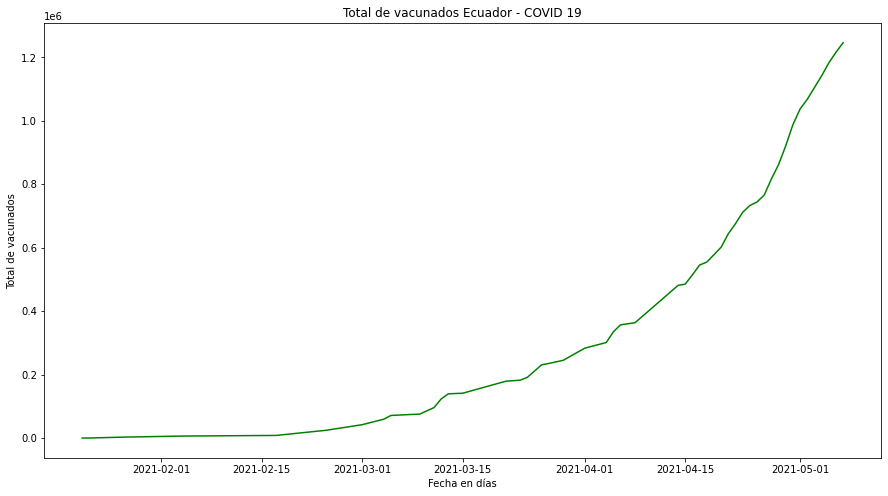

In [12]:
fig = plt.figure(figsize=(15,8))
plt.title('Total de vacunados Ecuador - COVID 19')
plt.plot(df['fecha'],df['dosis_total'], label='Vacunas COVID Ecuador', color='green',)
plt.xlabel('Fecha en días')
plt.ylabel('Total de vacunados')


A continuación se realizará la gráfica de acuerdo a los datos ingresados en cuanto a fecha de inicio y fecha final tanto para la primera dosis como la segunda dosis

In [13]:
df=df.loc[(df['fecha'] >= first_date) & (df['fecha'] <= end_date)]
date = df['fecha'].tolist()
total=df['dosis_total'].tolist()

Text(0, 0.5, 'Total de vacunados')

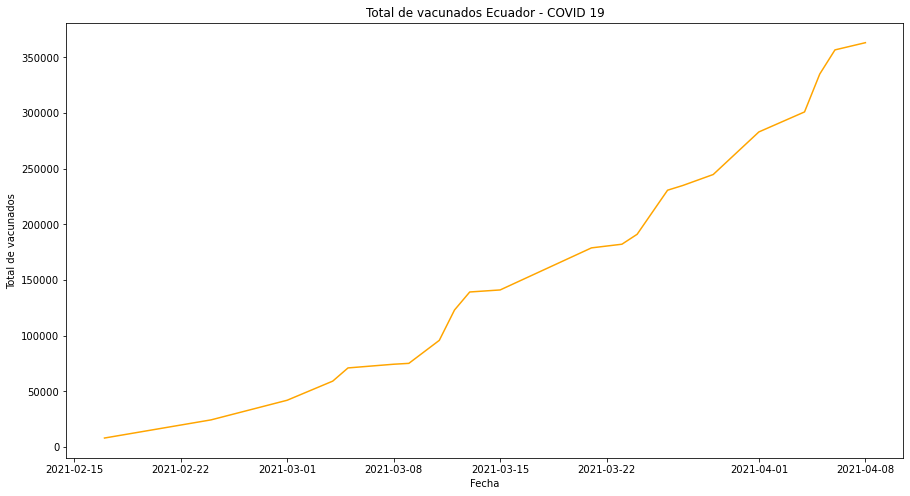

In [14]:
fig = plt.figure(figsize=(15,8))
plt.title('Total de vacunados Ecuador - COVID 19')
plt.plot(date,total, label='Vacunas COVID Ecuador', color='orange')
plt.xlabel('Fecha')
plt.ylabel('Total de vacunados')

2. Fabricante de la vacuna

In [15]:
df_prov_ = df_prov
df_perc = df_prov_.groupby(['vaccine'])[['total']].sum()
df_perc['%']=(df_perc['total']/df_perc['total'].sum())*100

#Readondear el porcentaje obtenido
df_perc_r = round(df_perc)
print(df_perc_r.shape)

(3, 2)


In [16]:
#Total de vacunas por fabricante
df_perc_r

,total,%
vaccine,,
Oxford/AstraZeneca,420000,20.0
Pfizer/BioNTech,659880,31.0
Sinovac,1020000,49.0


In [17]:
df_prov_ = df_prov
df_perc = df_prov_.groupby(['vaccine'])[['total']].sum()
df_perc['%']=(df_perc['total']/df_perc['total'].sum())*100

#Readondear el porcentaje obtenido
df_perc_r = round(df_perc)
print(df_perc_r.shape)

(3, 2)


<AxesSubplot:title={'center':'Total de vacunas por fabricante'}, ylabel='%'>

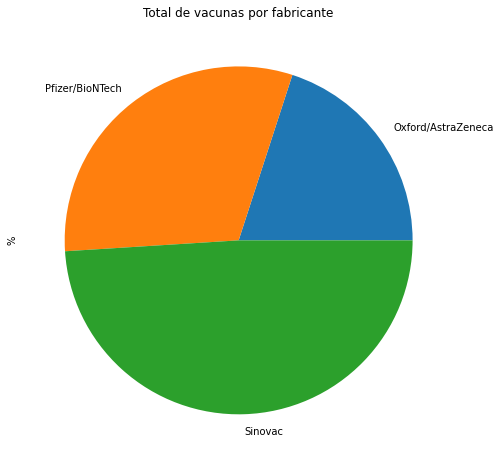

In [18]:
#Grafica total de vacunas por fabricante
fig = plt.figure(figsize=(15,8))
plt.title("Total de vacunas por fabricante")
graph = df_perc_r['%'].head()
graph.plot.pie()

A continuación se realizará la gráfica de acuerdo a la cantidad de fabricantes de vacunas de manera parametrizada:

In [19]:
df_prov_pie = df_prov
df_prov_pie=df_prov_pie.loc[(df_prov_pie['arrived_at'] >= first_date) & (df_prov_pie['arrived_at'] <= end_date)]
df_prov_pie = df_prov_pie.groupby(('vaccine')).total.sum()

<AxesSubplot:title={'center':'Total de vacunas por fabricante'}, ylabel='total'>

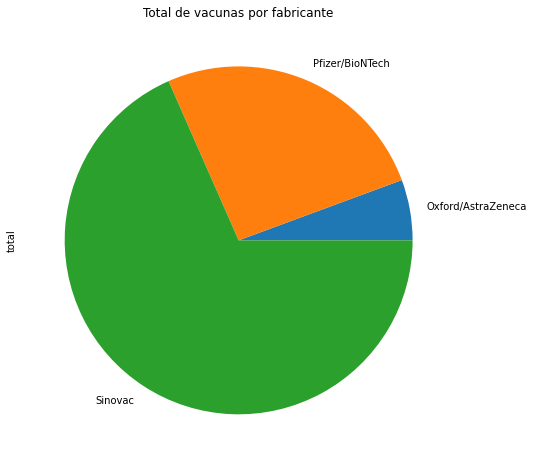

In [21]:
#Grafica total de vacunas por fabricante parametrizado
fig = plt.figure(figsize=(15,8))
plt.title("Total de vacunas por fabricante")
graph = df_prov_pie
graph.plot.pie()

Vacunas por mes de llegada y fabricante

In [22]:
#Cantidad de vacunas por fabricante que llegaron al Ecuador cada mes

#Realizamos una copia del dataframe del fabricante
df_prov_hist = df_prov
df_prov_hist=df_prov_hist.loc[(df_prov_hist['arrived_at'] >= first_date) & (df_prov_hist['arrived_at'] <= end_date)]
df_prov_hist_graph = df_prov_hist.groupby(['vaccine','arrived_at'],as_index=False)[['total']].sum()
df_prov_hist_graph

,vaccine,arrived_at,total
0,Oxford/AstraZeneca,2021-03-17,84000
1,Pfizer/BioNTech,2021-02-17,16380
2,Pfizer/BioNTech,2021-02-24,17550
3,Pfizer/BioNTech,2021-03-03,31590
4,Pfizer/BioNTech,2021-03-10,73710
5,Pfizer/BioNTech,2021-03-17,62010
6,Pfizer/BioNTech,2021-03-24,65520
7,Pfizer/BioNTech,2021-03-31,66690
8,Pfizer/BioNTech,2021-04-05,53820
9,Sinovac,2021-03-06,20000


Text(0, 0.5, 'Total de vacunas')

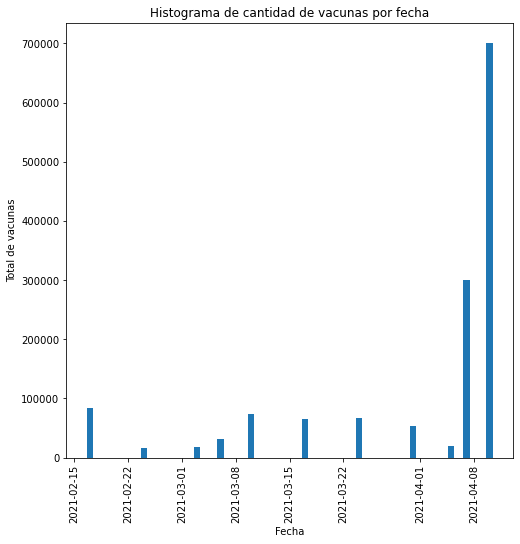

In [23]:
#Grafica total de vacunas por fecha
date = df_prov_hist['arrived_at'].tolist()
vaccine=df_prov_hist_graph['total'].tolist()
fig = plt.figure(figsize=(8,8))
plt.title('Histograma de cantidad de vacunas por fecha')
plt.bar(date, vaccine)
plt.xlabel('Fecha')
plt.xticks(rotation=90)
plt.ylabel('Total de vacunas')

Text(0, 0.5, 'Total de vacunas')

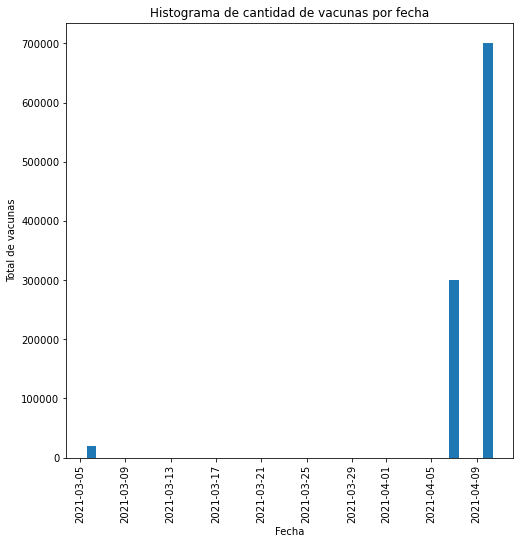

In [24]:
#Cantidad de vacunas por la fabrica de Sinovac
df_prov_s=df_prov_hist_graph.loc[(df_prov_hist_graph['vaccine'] == 'Sinovac')]
date = df_prov_s['arrived_at'].tolist()
vaccine=df_prov_s['total'].tolist()
fig = plt.figure(figsize=(8,8))
plt.title('Histograma de cantidad de vacunas por fecha')
plt.bar(date, vaccine)
plt.xlabel('Fecha')
plt.xticks(rotation=90)
plt.ylabel('Total de vacunas')

Text(0, 0.5, 'Total de vacunas')

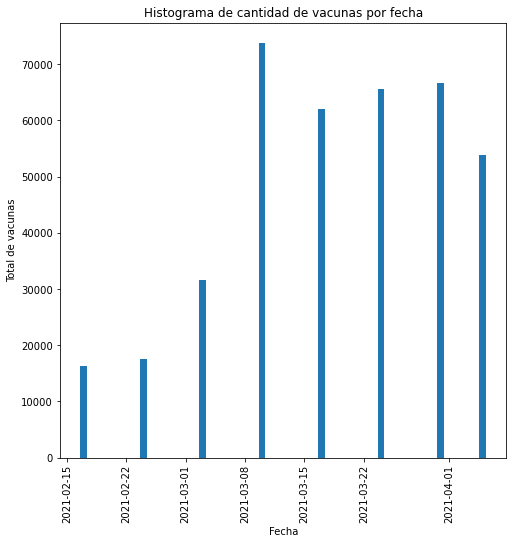

In [25]:
#Cantidad de vacunas por la fabrica de Pfizer
df_prov_p=df_prov_hist_graph.loc[(df_prov_hist_graph['vaccine'] == 'Pfizer/BioNTech')]
date = df_prov_p['arrived_at'].tolist()
vaccine=df_prov_p['total'].tolist()
fig = plt.figure(figsize=(8,8))
plt.title('Histograma de cantidad de vacunas por fecha')
plt.bar(date, vaccine)
plt.xlabel('Fecha')
plt.xticks(rotation=90)
plt.ylabel('Total de vacunas')

Text(0, 0.5, 'Total de vacunas')

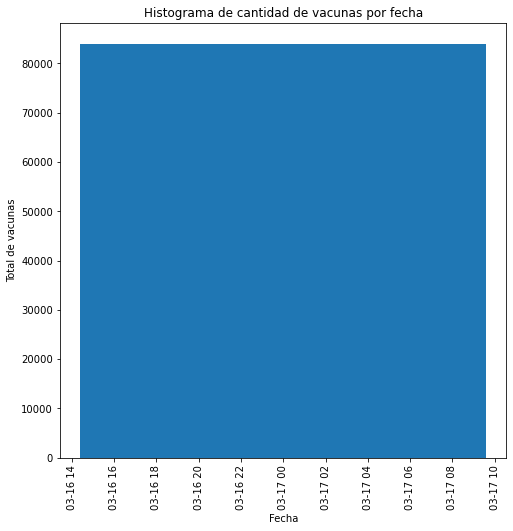

In [26]:
#Cantidad de vacunas por la fabrica de Astrazeneca
df_prov_o=df_prov_hist_graph.loc[(df_prov_hist_graph['vaccine'] == 'Oxford/AstraZeneca')]
date = df_prov_o['arrived_at'].tolist()
vaccine=df_prov_o['total'].tolist()
fig = plt.figure(figsize=(8,8))
plt.title('Histograma de cantidad de vacunas por fecha')
plt.bar(date, vaccine)
plt.xlabel('Fecha')
plt.xticks(rotation=90)
plt.ylabel('Total de vacunas')

# Modelo de predicción por regresión

Primera dosis:

In [27]:
#Variables
totaldate = df['fecha'].values.reshape(-1,1)
primera_dosis = df['primera_dosis'].values.reshape(-1,1)

In [28]:
#Split de datos
X_train, X_test, y_train, y_test = train_test_split(totaldate, primera_dosis, test_size=0.2, random_state=42) 

In [29]:
#Entrenamiento
linear_regressor = LinearRegression()  
linear_regressor.fit(X_train, y_train) 

LinearRegression()

In [30]:
print('Pentiende:', linear_regressor.coef_)
print('Intersección":',  linear_regressor.intercept_)

Pentiende: [[6.32599515e-11]]
Intersección": [-1.02100732e+08]


In [31]:
#prediccion1_dosis = linear_regressor.predict(X_test)

In [32]:
#PRUEBA 1

m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]
#Prediccion de x dias desde la fecha inicial del Dataset 2020-03-01
dias=700
label1 = m*dias-c
print("Numero de casos a los ",dias," de la fecha inicial del dataset, se obtiene una prediccion de : ",label1)

Numero de casos a los  700  de la fecha inicial del dataset, se obtiene una prediccion de :  102100732.1242712


In [33]:
#PRUEBA 2

m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]
#Prediccion de x dias desde la fecha inicial del Dataset 2020-03-01
dias=750
label2 = m*dias-c
print("Numero de casos a los ",dias," de la fecha inicial del dataset, se obtiene una prediccion de : ",label2)

Numero de casos a los  750  de la fecha inicial del dataset, se obtiene una prediccion de :  102100732.1242712


In [34]:
#PRUEBA 3

m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]
#Prediccion de x dias desde la fecha inicial del Dataset 2020-03-01
dias=800
label3 = m*dias-c
print("Numero de casos a los ",dias," de la fecha inicial del dataset, se obtiene una prediccion de : ",label3)

Numero de casos a los  800  de la fecha inicial del dataset, se obtiene una prediccion de :  102100732.1242712


Segunda dosis:

In [35]:
#Variables
totaldate = df['fecha'].values.reshape(-1,1)
segunda_dosis = df['segunda_dosis'].values.reshape(-1,1)

In [36]:
#Split de datos
X_train2, X_test2, y_train2, y_test2 = train_test_split(totaldate, segunda_dosis, test_size=0.2, random_state=42)

In [37]:
#Entrenamiento
linear_regressor2 = LinearRegression()  
linear_regressor2.fit(X_train2, y_train2)

LinearRegression()

In [38]:
print('Pentiende:', linear_regressor2.coef_)
print('Intersección":',  linear_regressor2.intercept_)

Pentiende: [[3.55126789e-11]]
Intersección": [-57350681.62325501]


In [39]:
#prediccion2_dosis = linear_regressor2.predict(X_test2)

In [40]:
#PRUEBA 1

m = linear_regressor2.coef_[0][0]
c = linear_regressor2.intercept_[0]
#Prediccion de x dias desde la fecha inicial del Dataset 2020-03-01
dias=700
label1 = m*dias-c
print("Numero de casos a los ",dias," de la fecha inicial del dataset, se obtiene una prediccion de : ",label1)

Numero de casos a los  700  de la fecha inicial del dataset, se obtiene una prediccion de :  57350681.62325504


In [41]:
#PRUEBA 2

m = linear_regressor2.coef_[0][0]
c = linear_regressor2.intercept_[0]
#Prediccion de x dias desde la fecha inicial del Dataset 2020-03-01
dias=750
label2 = m*dias-c
print("Numero de casos a los ",dias," de la fecha inicial del dataset, se obtiene una prediccion de : ",label2)

Numero de casos a los  750  de la fecha inicial del dataset, se obtiene una prediccion de :  57350681.623255044


In [42]:
#PRUEBA 3

m = linear_regressor2.coef_[0][0]
c = linear_regressor2.intercept_[0]
#Prediccion de x dias desde la fecha inicial del Dataset 2020-03-01
dias=800
label3 = m*dias-c
print("Numero de casos a los ",dias," de la fecha inicial del dataset, se obtiene una prediccion de : ",label3)

Numero de casos a los  800  de la fecha inicial del dataset, se obtiene una prediccion de :  57350681.623255044


Como se puede apreciar en la prueba 1 de "PRIMERA DOSIS" vs "SEGUNDA DOSIS" existe una gran diferencia de predicción de cantidad de contagios con una dosis y con dos dosis en el Ecuador. De igual manera se puede apreciar este cambio con la prueba 2 y 3 tanto de primera dosis como de segunda dosis

# Ecuador vs otros paises

Para poder generar un proceso de comparación de los datos de COVID 19 entre los distintos paises del mundo se ha escogido a Alemania y Grecia como paises de Europa y como representante de Latinoamérica se trabajará con Brasil

In [43]:
#Carga de datos

#Ecuador
df_ECU = pd.read_csv('in/vacunas.csv', sep = ',')

#Alemania
df_DEU =  pd.read_csv('in/germany.csv', sep = ',')

#Brasil
df_BRA = pd.read_csv('in/BRAZIL.csv', sep = ',')
df_BRA

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Brazil,BRA,2021-01-16,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
1,Brazil,BRA,2021-01-17,112.0,112.0,NaN,112.0,112.0,0.00,0.00,NaN,1.0
2,Brazil,BRA,2021-01-18,1109.0,1109.0,NaN,997.0,554.0,0.00,0.00,NaN,3.0
3,Brazil,BRA,2021-01-19,11470.0,11470.0,NaN,10361.0,3823.0,0.01,0.01,NaN,18.0
4,Brazil,BRA,2021-01-20,28543.0,28543.0,NaN,17073.0,7136.0,0.01,0.01,NaN,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...
110,Brazil,BRA,2021-05-06,46542392.0,31504414.0,15037978.0,356703.0,650348.0,21.90,14.82,7.07,3060.0
111,Brazil,BRA,2021-05-07,46875460.0,31722544.0,15152916.0,333068.0,596657.0,22.05,14.92,7.13,2807.0
112,Brazil,BRA,2021-05-08,NaN,NaN,NaN,NaN,571797.0,NaN,NaN,NaN,2690.0
113,Brazil,BRA,2021-05-09,NaN,NaN,NaN,NaN,575528.0,NaN,NaN,NaN,2708.0


Alemania

In [44]:
df_DEU.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Germany,DEU,2020-12-27,23999,23986,13,NaN,NaN,0.03,0.03,0.0,NaN
1,Germany,DEU,2020-12-28,42485,42435,50,18486.0,18486.0,0.05,0.05,0.0,221.0
2,Germany,DEU,2020-12-29,93221,92446,775,50736.0,34611.0,0.11,0.11,0.0,413.0
3,Germany,DEU,2020-12-30,155893,154998,895,62672.0,43965.0,0.19,0.18,0.0,525.0
4,Germany,DEU,2020-12-31,205912,204868,1044,50019.0,45478.0,0.25,0.24,0.0,543.0


In [45]:
df_DEU_new = df_DEU.loc[:,['date','total_vaccinations']] #Seleccionar la columna correspondiente a la información de Alemania
df_DEU_new 

,date,total_vaccinations
0,2020-12-27,23999
1,2020-12-28,42485
2,2020-12-29,93221
3,2020-12-30,155893
4,2020-12-31,205912
...,...,...
130,2021-05-06,33634276
131,2021-05-07,34471826
132,2021-05-08,34880369
133,2021-05-09,35152143


In [46]:
# Expresar las fechas en numero de dias
FMT = '%Y-%m-%d'
df_DEU_new['date'] = df_DEU_new['date'].map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-12-27", FMT)).days)

In [47]:
df_DEU_new

,date,total_vaccinations
0,0,23999
1,1,42485
2,2,93221
3,3,155893
4,4,205912
...,...,...
130,130,33634276
131,131,34471826
132,132,34880369
133,133,35152143


In [48]:
#Modelo regresion
X_DEU = df_DEU_new['date'].values.reshape(-1,1)
y_DEU = df_DEU_new['total_vaccinations'].values.reshape(-1,1)
reg_DEU = RandomForestRegressor(n_estimators=10, random_state=0)
reg_DEU.fit(X_DEU, y_DEU.ravel())

RandomForestRegressor(n_estimators=10, random_state=0)

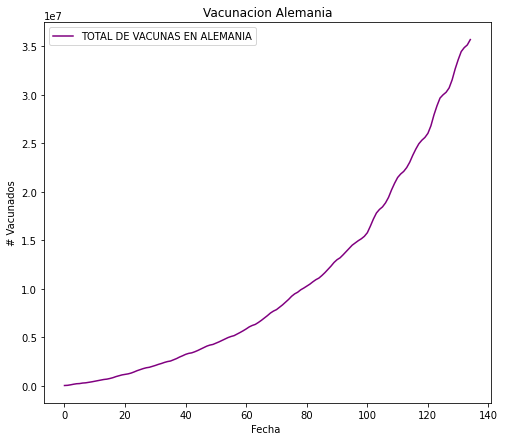

In [49]:
plt.figure(figsize = (8,7))
plt.plot(X_DEU, y_DEU, '-', label ='TOTAL DE VACUNAS EN ALEMANIA',color='purple')
plt.title('Vacunacion Alemania')
plt.xlabel('Fecha ')
plt.ylabel('# Vacunados')
plt.legend()
plt.show()

Brasil

In [50]:
df_BRA.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Brazil,BRA,2021-01-16,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
1,Brazil,BRA,2021-01-17,112.0,112.0,NaN,112.0,112.0,0.00,0.00,NaN,1.0
2,Brazil,BRA,2021-01-18,1109.0,1109.0,NaN,997.0,554.0,0.00,0.00,NaN,3.0
3,Brazil,BRA,2021-01-19,11470.0,11470.0,NaN,10361.0,3823.0,0.01,0.01,NaN,18.0
4,Brazil,BRA,2021-01-20,28543.0,28543.0,NaN,17073.0,7136.0,0.01,0.01,NaN,34.0


In [51]:
df_BRA_new = df_BRA.loc[:,['date','total_vaccinations']] #Seleccionar la columna correspondiente a la información de Alemania
df_BRA_new 

,date,total_vaccinations
0,2021-01-16,0.0
1,2021-01-17,112.0
2,2021-01-18,1109.0
3,2021-01-19,11470.0
4,2021-01-20,28543.0
...,...,...
110,2021-05-06,46542392.0
111,2021-05-07,46875460.0
112,2021-05-08,NaN
113,2021-05-09,NaN


In [52]:
# Expresar las fechas en numero de dias
FMT = '%Y-%m-%d'
df_BRA_new['date'] = df_BRA_new['date'].map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2021-01-16", FMT)).days)

In [53]:
df_BRA_new

,date,total_vaccinations
0,0,0.0
1,1,112.0
2,2,1109.0
3,3,11470.0
4,4,28543.0
...,...,...
110,110,46542392.0
111,111,46875460.0
112,112,NaN
113,113,NaN


In [54]:
df_BRA_CLEAN = df_BRA_new.fillna(0)

In [55]:
df_BRA_CLEAN

,date,total_vaccinations
0,0,0.0
1,1,112.0
2,2,1109.0
3,3,11470.0
4,4,28543.0
...,...,...
110,110,46542392.0
111,111,46875460.0
112,112,0.0
113,113,0.0


In [56]:
#Modelo regresion
X_BRA = df_BRA_CLEAN['date'].values.reshape(-1,1)
y_BRA = df_BRA_CLEAN['total_vaccinations'].values.reshape(-1,1)
reg_BRA = RandomForestRegressor(n_estimators=10, random_state=0)
reg_BRA.fit(X_BRA, y_BRA.ravel())

RandomForestRegressor(n_estimators=10, random_state=0)

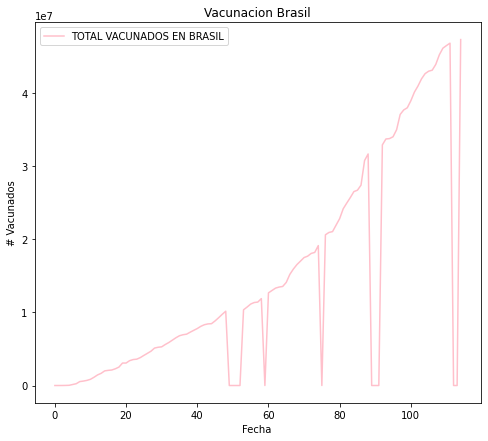

In [57]:
plt.figure(figsize = (8,7))
plt.plot(X_BRA, y_BRA, '-', label ='TOTAL VACUNADOS EN BRASIL', color='pink')
plt.title('Vacunacion Brasil')
plt.xlabel('Fecha ')
plt.ylabel('# Vacunados')
plt.legend()
plt.show()

Como se puede observar en la grafica anterior existen caidas a 0 y esto ocurrio al momento de limpiar el total de vacunas por fechas puesto que habian fechas que no tuvieron vacunas, por lo que se igualo a cero estas fechas

Ecuador

In [58]:
df_ECU.head(3)

,fecha,dosis_total,primera_dosis,segunda_dosis
0,21/01/2021,0,0,0
1,22/01/2021,108,108,0
2,27/01/2021,2982,2982,0


In [59]:
# Expresar las fechas en numero de dias
FMT = '%d/%m/%Y'
df_ECU['fecha'] = df_ECU['fecha'].map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("21/01/2021", FMT)).days)

In [60]:
#Modelo regresion
X_ECU = df_ECU['fecha'].values.reshape(-1,1)
y_ECU = df_ECU['dosis_total'].values.reshape(-1,1)
reg_ECU = RandomForestRegressor(n_estimators=10, random_state=0)
reg_ECU.fit(X_ECU, y_ECU.ravel())

RandomForestRegressor(n_estimators=10, random_state=0)

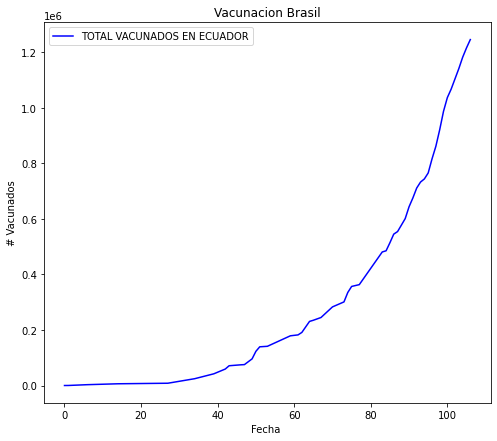

In [61]:
plt.figure(figsize = (8,7))
plt.plot(X_ECU, y_ECU, '-', label ='TOTAL VACUNADOS EN ECUADOR', color='blue')
plt.title('Vacunacion Brasil')
plt.xlabel('Fecha ')
plt.ylabel('# Vacunados')
plt.legend()
plt.show()

Ecuador vs Brasil vs Alemania

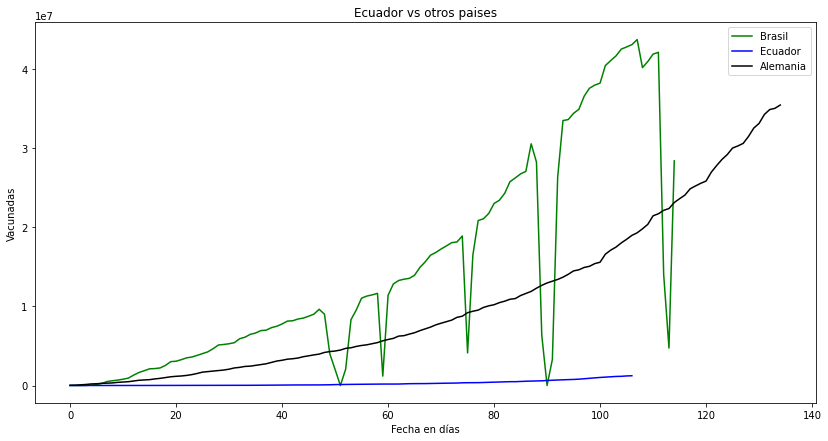

In [62]:
plt.figure(figsize = (14,7))
plt.plot(X_BRA, reg_BRA.predict(X_BRA),  '-', label = 'Brasil', color='green')
plt.plot(X_ECU, reg_ECU.predict(X_ECU),  '-', label = 'Ecuador', color='blue')
plt.plot(X_DEU, reg_DEU.predict(X_DEU),  '-', label = 'Alemania', color='black')
plt.title('Ecuador vs otros paises')
plt.xlabel('Fecha en días')
plt.ylabel('Vacunadas')
plt.legend()
plt.show()